In [1]:
# Standard imports
import matplotlib.pyplot as plt
from matplotlib.gridspec import GridSpec
import numpy as np
from scipy.stats import linregress
%config InlineBackend.figure_format = 'retina'
seed = np.random.randint(12345)
np.random.seed(seed)
#import pingouin
from scipy.stats import pearsonr
# Useful helper function
r_squared = lambda x,y: linregress(x.ravel().T, y.ravel().T)[2]**2

In [2]:
# def r2_sigma(y, yhat, number_trials=1000, size_drawn_frac=0.25):

#     number_data = len(y)
#     Rsq_bs = np.zeros(shape=number_trials)
#     size_of_drawn_samples = int(size_drawn_frac*number_data)
#     for trial in range(number_trials):
#         # sample frac (size_drawn_frac) the data with replacement
#         ix = np.random.choice(number_data, size=size_of_drawn_samples, replace=True)
#         # compute R^2
#         Rsq_bs[trial] = np.corrcoef(y[ix], yhat[ix])[0][1]**2
#     return np.std(Rsq_bs)/np.sqrt(size_of_drawn_samples)

In [3]:
# Write function to compute bootstrap resampled uncertainties in correlation coefficient.
def my_rsquared(x,y, bootstrap_samples=1000):
    """Returns R^2 and SE thereof based on bootstrap resampling"""
    r2 = pearsonr(x,y)[0]**2 # pingouin.corr(x, y).loc['pearson','r']**2
    N = len(x)
    assert len(x)==len(y), f'len(x)={len(x)} and len(y)={len(y)} are not the same.'
    r2s = np.zeros(bootstrap_samples)
    for i in range(bootstrap_samples):
        ix = np.random.choice(a=bootstrap_samples, size=bootstrap_samples, replace=True)
        r2s[i] = pearsonr(x[ix],y[ix])[0]**2 #pingouin.corr(x[ix], y[ix]).loc['pearson','r']**2
    dr2 = np.std(r2s)
    return r2, dr2

In [4]:
style_file_name = 'fig4.style'
s = """
axes.linewidth:     0.5     # edge linewidth
font.size:          7.0
axes.labelsize:     7.0  # fontsize of the x any y labels
xtick.labelsize:    7.0  # fontsize of the tick labels
ytick.labelsize:    7.0  # fontsize of the tick labels
legend.fontsize:      7.0
legend.borderpad:     0.2  # border whitespace
legend.labelspacing:  0.2  # the vertical space between the legend entries
legend.borderaxespad: 0.2  # the border between the axes and legend edge
legend.framealpha:    1.0 
"""
with open(style_file_name, 'w') as f:
    f.write(s)
    
plt.style.use(style_file_name)
plt.rc('font', family='sans-serif')
plt.rc('font', family='sans-serif')

In [5]:
fig_si_npz = np.load('fig4_SI_dict.npz')
y_test_ABeta=fig_si_npz['y_test_ABeta']
yhat_test_ABeta=fig_si_npz['yhat_test_ABeta']
yqs_grid_ABeta=fig_si_npz['yqs_grid_ABeta']
yhat_test_TDP=fig_si_npz['yhat_test_TDP']
y_test_TDP=fig_si_npz['y_test_TDP']
yqs_grid_TDP=fig_si_npz['yqs_grid_TDP']

In [6]:
# Model predictions for wt sequences
phi_wt_ABeta = 1.1025
yhat_wt_ABeta = 0.12027
phi_wt_TDP = -0.01602
yhat_wt_TDP = -0.0022342

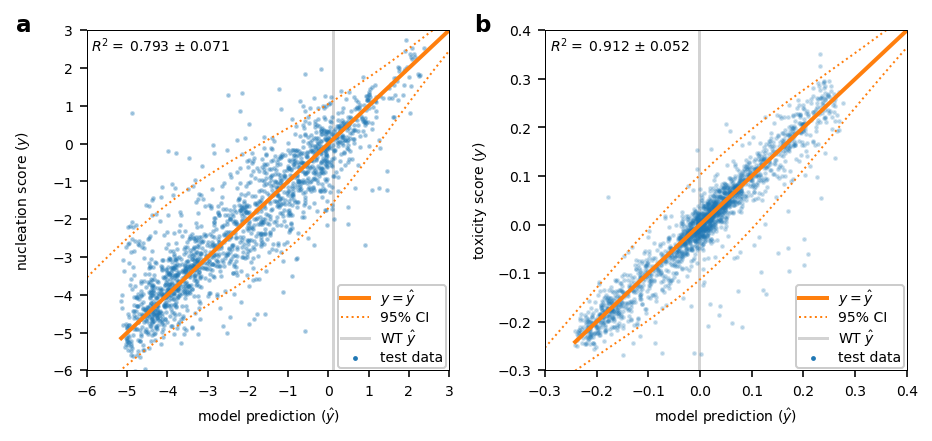

In [7]:
fig = plt.figure(figsize=[6.5, 3])

plt.style.use(style_file_name)
gs = fig.add_gridspec(1, 2)
# Define panels
ax_a = fig.add_subplot(gs[0, 0])
ax_b = fig.add_subplot(gs[0, 1])

alpha = 0.2


# Panel A: Scatter plot ABeta
q = [.025,.975]
ylim = [-6, 3]
yticks = [-6, -5, -4, -3, -2, -1, 0, 1, 2, 3]
ax = ax_a
yhat_test = yhat_test_ABeta
xlim = [min(yhat_test), ylim[1]]
yhat_grid = np.linspace(ylim[0], ylim[1], 1000)
yqs_grid = yqs_grid_ABeta
ax.scatter(yhat_test,
           y_test_ABeta, 
           s=2,
           alpha=alpha+0.1,
           color='C0',
           label='test data')
ax.set_xticks(yticks)
ax.set_yticks(yticks)
ax.set_xlabel('model prediction ($\hat{y}$)')
ax.set_ylabel('nucleation score ($y$)', labelpad=10)
ax.set_xlim(ylim)
ax.set_ylim(ylim)
ax.plot(xlim, xlim, linestyle='-', color='C1', linewidth=2, label='$y = \hat{y}$')
ax.plot(yhat_grid, yqs_grid[:,0], linestyle=':', color='C1', linewidth=1, label='95% CI')
ax.plot(yhat_grid, yqs_grid[:,1], linestyle=':', color='C1', linewidth=1)

# draw wt phi
ax.axvline(yhat_wt_ABeta, color='lightgray', zorder=-1, label='WT $\hat{y}$')

leg = ax.legend(loc='lower right')
for lh in leg.legendHandles:
    lh.set_alpha(1)

# Compute R^2 and Is
r2, r2_err = my_rsquared(yhat_test, y_test_ABeta)


#ax.text(x=-5.9, y=2.6, s=f'$R^2 =$ {r2:.3f} $\pm$ {r2_err:.3f}', 
# uncertainty computed in script in figure 4b from the main text
ax.text(x=-5.9, y=2.6, s=f'$R^2 =$ {r2:.3f} $\pm$ 0.071', 
        ha='left', va='center');

# Panel B: Scatter plot TDP-43
ylim = [-0.3, 0.4]
yticks = [-0.3, -0.2, -0.1, 0, 0.1, 0.2, 0.3, 0.4]

ax = ax_b
# Select 2000 random point for better visuzlization
ix = np.random.choice(y_test_TDP.shape[0], 2000, replace=False)
yhat_test = yhat_test_TDP
xlim = [min(yhat_test), ylim[1]]
yhat_grid = np.linspace(ylim[0], ylim[1], 1000)
yqs_grid = yqs_grid_TDP
ax.scatter(yhat_test[ix],
           y_test_TDP[ix], 
           s=2,
           alpha=alpha,
           color='C0',
           label='test data')
ax.set_xticks(yticks)
ax.set_yticks(yticks)
ax.set_xlabel('model prediction ($\hat{y}$)')
ax.set_ylabel('toxicity score ($y$)')
ax.set_xlim(ylim)
ax.set_ylim(ylim)
ax.plot(xlim, xlim, linestyle='-', color='C1', linewidth=2, label='$y = \hat{y}$')
ax.plot(yhat_grid, yqs_grid[:,0], linestyle=':', color='C1', linewidth=1, label='95% CI')
ax.plot(yhat_grid, yqs_grid[:,1], linestyle=':', color='C1', linewidth=1)

# draw wt phi
ax.axvline(yhat_wt_TDP, color='lightgray', zorder=-1, label='WT $\hat{y}$')

leg = ax.legend(loc='lower right')
for lh in leg.legendHandles:
    lh.set_alpha(1)


# Compute R^2 and I's
r2, r2_err = my_rsquared(yhat_test, y_test_TDP)

yhat_test_TDP = yhat_test
yqs_grid_TDP = yqs_grid

ax.text(x=-0.29, y=0.37,
        #s=f'$R^2 =$ {r2:.3f} $\pm$ {r2_err:.3f}', 
        # uncertainty computed in script for Figure 4d
        # from the main text using corrected bootsrap
        s=f'$R^2 =$ {r2:.3f} $\pm$ 0.052', 
        ha='left', va='center');


# Add panel labels
fig.text(0.02, 0.95, 'a', fontsize=11.5, fontweight='bold')
fig.text(0.51, 0.95, 'b', fontsize=11.5, fontweight='bold')

# Clean up and save
fig.tight_layout()
fig.savefig('fig4_supp.png', dpi=400, facecolor='w')